In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download Tesla stock data
df = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_19012\274720482.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


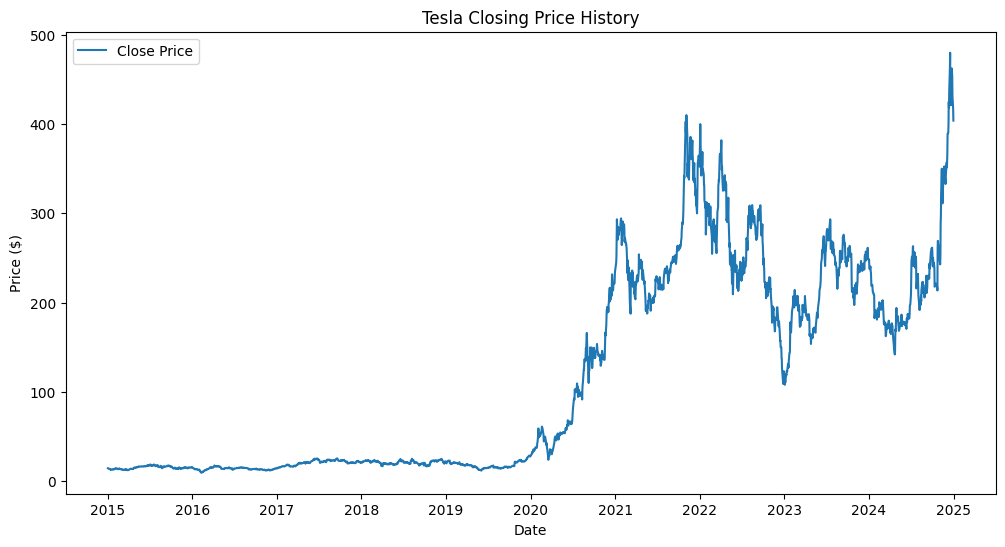

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Set frequency to business days and forward fill missing data
ts = df['Close'].asfreq('B')
ts = ts.fillna(method='ffill')


In [38]:
split_date = '2024-01-01'

train = ts[:split_date]
test = ts[split_date:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")


Train size: 2347
Test size: 262


In [39]:
auto_model = pm.auto_arima(train, seasonal=False, stepwise=True,
suppress_warnings=True, trace=True)

print(f"Best ARIMA order: {auto_model.order}")


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14727.953, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14751.779, Time=0.07 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14751.513, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14751.519, Time=0.19 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14750.520, Time=0.08 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14754.312, Time=0.81 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14755.511, Time=0.34 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14733.554, Time=1.14 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14733.593, Time=1.81 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14753.504, Time=0.22 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14752.995, Time=0.74 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14753.603, Time=0.88 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14735.536, Time=2.22 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14726.710, Time=1.44 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14753.082, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14754.297, Time=0.18 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=14732.354, Time=0.78 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=14732.403, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14752.287, Time=0.13 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=14751.821, Time=0.45 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=14752.431, Time=0.40 sec


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=14734.344, Time=1.05 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 15.947 seconds
Best ARIMA order: (2, 1, 2)


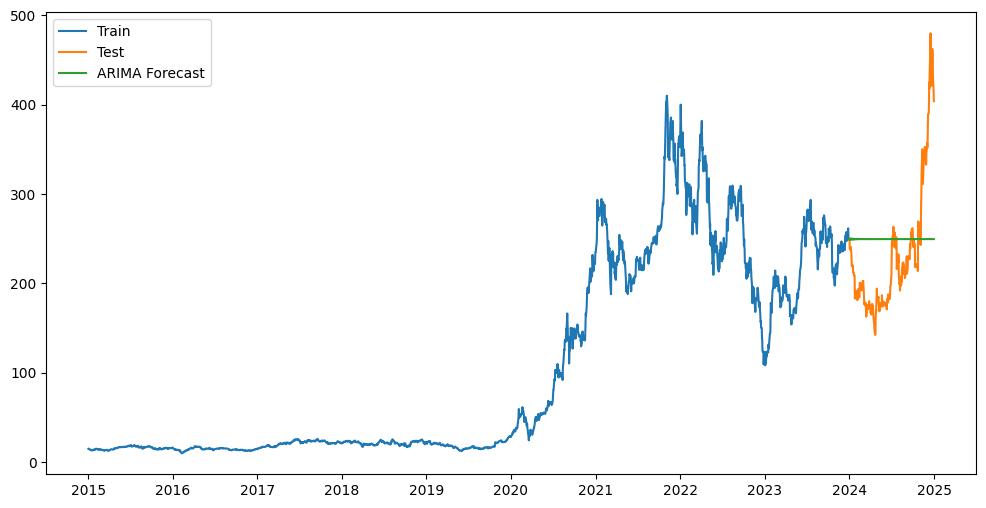

In [40]:
model_arima = ARIMA(train, order=auto_model.order)
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()


In [41]:
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = sqrt(mean_squared_error(test, forecast_arima))
mape_arima = np.mean(np.abs((test - forecast_arima) / test)) * 100

print(f"ARIMA MAE: {mae_arima:.4f}")
print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"ARIMA MAPE: {mape_arima:.4f}%")


ARIMA MAE: 58.9250
ARIMA RMSE: 73.7586
ARIMA MAPE: nan%


In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train.values.reshape(-1,1))
test_scaled = scaler.transform(test.values.reshape(-1,1))

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (2287, 60, 1)
y_train shape: (2287, 1)


In [43]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)




Epoch 1/20

65/65 [==============================] - 6s 41ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 2/20
65/65 [==============================] - 2s 29ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3/20
65/65 [==============================] - 2s 27ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/20
65/65 [==============================] - 2s 27ms/step - loss: 8.1048e-04 - val_loss: 0.0012
Epoch 5/20
65/65 [==============================] - 2s 26ms/step - loss: 7.0853e-04 - val_loss: 0.0016
Epoch 6/20
65/65 [==============================] - 2s 27ms/step - loss: 6.4655e-04 - val_loss: 0.0012
Epoch 7/20
65/65 [==============================] - 2s 27ms/step - loss: 6.5183e-04 - val_loss: 8.1534e-04
Epoch 8/20
65/65 [==============================] - 2s 27ms/step - loss: 5.2716e-04 - val_loss: 7.5655e-04
Epoch 9/20
65/65 [==============================] - 2s 26ms/step - loss: 5.8355e-04 - val_loss: 0.0016
Epoch 10/20
65/65 [==============================] - 2s 27ms/step - loss: 

7/7 [==============================] - 1s 13ms/step


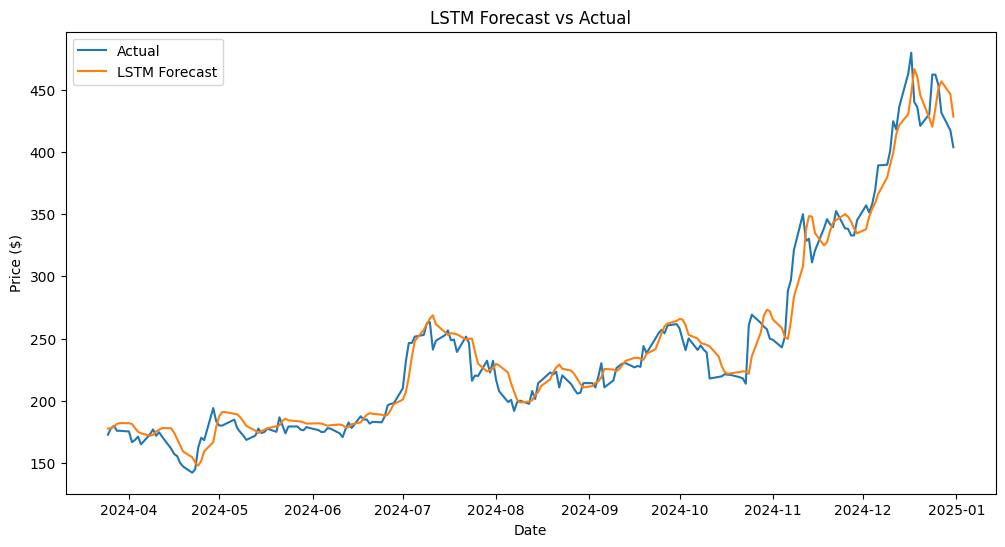

In [44]:
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

test_dates = test.index[seq_length:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_true, label='Actual')
plt.plot(test_dates, y_pred, label='LSTM Forecast')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [45]:
mae_lstm = mean_absolute_error(y_true, y_pred)
rmse_lstm = sqrt(mean_squared_error(y_true, y_pred))
mape_lstm = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAPE: {mape_lstm:.4f}%")


LSTM MAE: 10.2747
LSTM RMSE: 13.8680
LSTM MAPE: 4.2015%


In [46]:
print("Model Performance Comparison:")
print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.4f}%")
print(f"LSTM  - MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}, MAPE: {mape_lstm:.4f}%")

print("\nDiscussion:")
print("""
- ARIMA is simpler and interpretable but assumes linearity.
- LSTM captures nonlinear relationships and temporal dependencies but needs more data and tuning.
- Depending on dataset patterns and tuning, one may outperform the other.
- Further hyperparameter tuning and hybrid approaches could improve results.
""")


Model Performance Comparison:
ARIMA - MAE: 58.9250, RMSE: 73.7586, MAPE: nan%
LSTM  - MAE: 10.2747, RMSE: 13.8680, MAPE: 4.2015%

Discussion:

- ARIMA is simpler and interpretable but assumes linearity.
- LSTM captures nonlinear relationships and temporal dependencies but needs more data and tuning.
- Depending on dataset patterns and tuning, one may outperform the other.
- Further hyperparameter tuning and hybrid approaches could improve results.



1/1 [==============================] - 0s 31ms/step


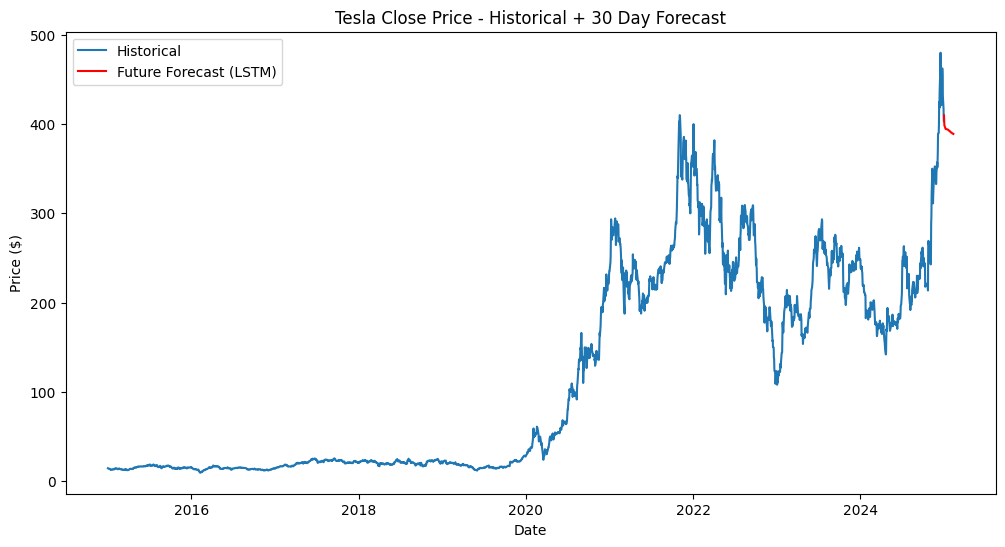

In [47]:
forecast_steps = 30
future_forecast_scaled = []

# Seed sequence is the last seq_length days from test_scaled
input_seq = test_scaled[-seq_length:].reshape(1, seq_length, 1)

for _ in range(forecast_steps):
    pred_scaled = model_lstm.predict(input_seq)[0][0]
    future_forecast_scaled.append(pred_scaled)
    # Update input sequence by appending the prediction and removing the oldest
    input_seq = np.append(input_seq[:,1:,:], [[[pred_scaled]]], axis=1)

future_forecast_scaled = np.array(future_forecast_scaled).reshape(-1, 1)
future_forecast = scaler.inverse_transform(future_forecast_scaled)

# Create future dates starting from day after last test date
last_date = test.index[-1]
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Plot historical + future forecast
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label='Historical')
plt.plot(future_dates, future_forecast, label='Future Forecast (LSTM)', color='red')
plt.title('Tesla Close Price - Historical + 30 Day Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [48]:
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close_Price': future_forecast.flatten()
})

future_forecast_df.to_csv('../data/tesla_lstm_30day_forecast.csv', index=False)
